<a href="https://colab.research.google.com/github/NeginKhalifat/TensorFlow_PracticeNotes/blob/main/2_Prove_Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moore's law:
          C=A r^(t)

# Upload Dataset

In [25]:
import os.path
from os import path
if not path.exists("moore.csv"):
  !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
data= pd.read_csv('moore.csv',header=None)


In [27]:
X=(data.iloc[:,0]).values.reshape(-1,1)
y=data.iloc[:,1]



> reshape:(-1)  It simply means that it is an unknown dimension and we want numpy to figure it out.




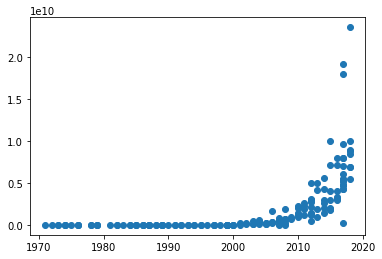

In [28]:
plt.scatter(X,y)

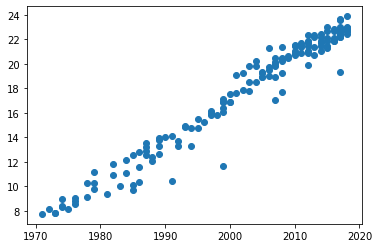

In [29]:
y = np.log(y)
plt.scatter(X,y)

In [30]:
X=X-X.mean()

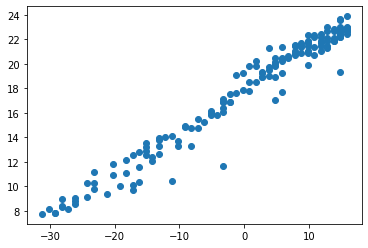

In [40]:
plt.scatter(X,y)

Create Model to find slop of line:

In [31]:
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(1,input_shape=(1,))
])

In [32]:

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(0.001,0.9),loss='mse')


# Learning Rate decay: 



slowly reduce alpha:
            

      alpha = (1/(1+decay_rate) * #epoch) * alpha_prev

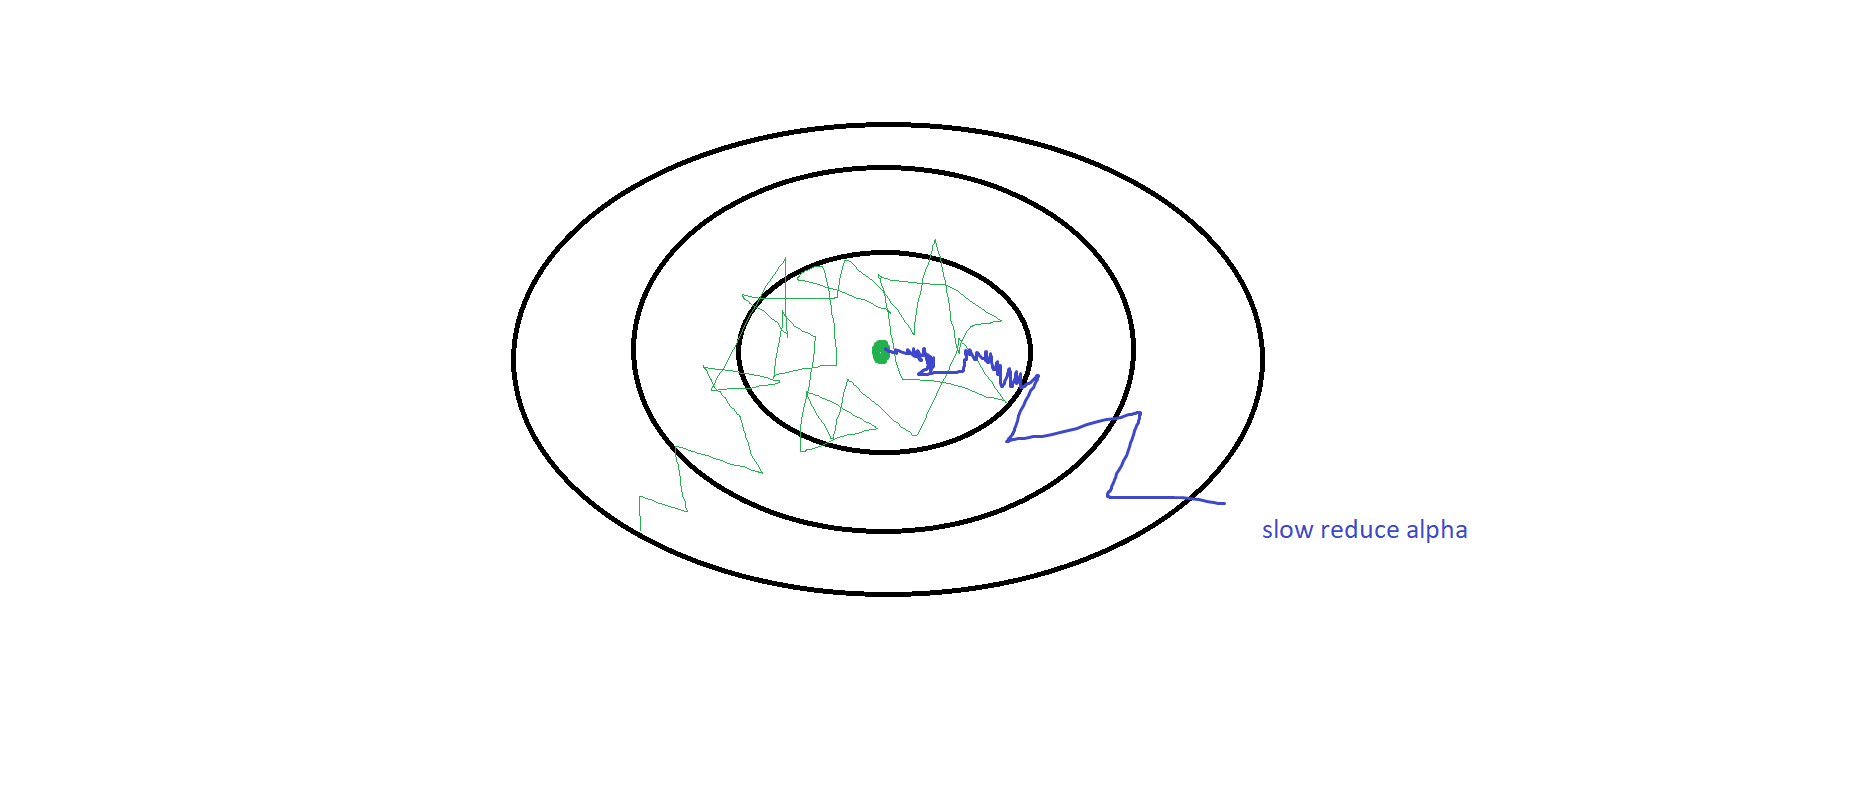

In [33]:
import math
def scheduler1(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
scheduler= tf.keras.callbacks.LearningRateScheduler(scheduler1)
r= model.fit(X,y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 362.2219
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 301.1007
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 246.9128
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 216.5541
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 189.0800
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 161.3815
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 106.8536
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 71.7913
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 63.1112
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 69.7965
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 35.6116
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 30.0327
Epoch 13/200
6/6 [========================

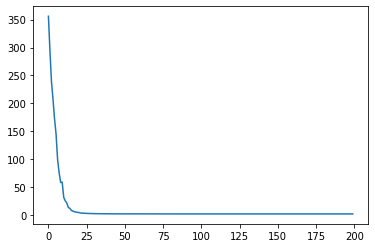

In [34]:
plt.plot(r.history['loss'],label="Loss")

# Get W:

**input layer does not count**

In [37]:
a=model.layers[0].get_weights()
print (model.layers[0].get_weights())   # slope (a)

[array([[0.34202135]], dtype=float32), array([16.720274], dtype=float32)]


# time to double:
                                                    C=A r^(t)

                                            log c = log r *t + log A

                                             y     = a     *x +   b


---


                                                  a = log r
                                                  b = log A


---


                                                  2*C=A r^(t_next)

                                                  2 =r^(t_next-t)
                                                  t_next-t = log2/log r



---

In [39]:

print(math.log(2)/a[0][0])

[2.0266197]


# conclusion:
Moore's law is the observation that the number of transistors in a dense integrated circuit **doubles** about every two **years**.
